# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('data.csv')
df=data.dropna()

In [4]:
df

text  emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism     fear
21455  Successive state elections have seen the gover...     fear
21456               Vincent was irritated but not dismay     fear
21457  Kendall-Hume turned back to face the dismayed ...     fear
21458                    I am dismayed , but not surpris     fear

[21459 rows x 2 columns]

In [5]:
df.columns

Index(['text', 'emotion'], dtype='object')

In [6]:
df.groupby('emotion').describe()

text                                                               
         count unique                                                top freq
emotion                                                                      
anger     2993   2992         There was a hint of exasperation in his vo    2
fear      2652   2651  His comments are a major diplomatic gaffe as t...    2
happy     7029   7028  i feel more adventurous willing to take risks ...    2
love      1641   1641  i am ever feeling nostalgic about the fireplac...    1
sadness   6265   6265                            i didnt feel humiliated    1
surprise   879    879  ive been taking or milligrams or times recomme...    1

Text(0.5, 1.0, 'EMOTION')

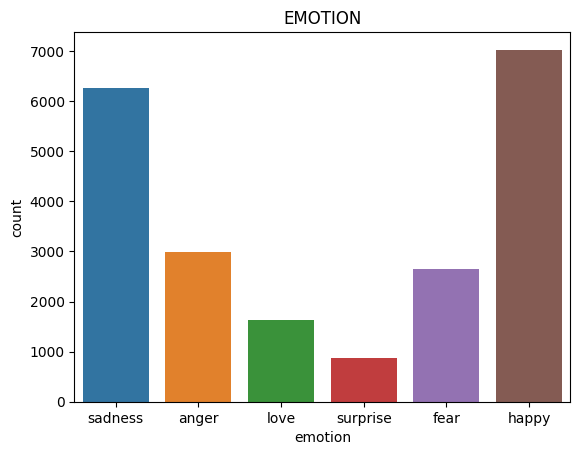

In [7]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "emotion", data = df)
df.loc[:, 'emotion'].value_counts()
plt.title('EMOTION')

In [8]:
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

Training model:

In [9]:
#!pip install nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['text']=df['text'].str.strip()
# lowercase the text
df['text'] = df['text'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['text']=df['text'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['text'].split(' '),axis=1)
# removing stopwords
df['text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [12]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

defaultdict(<class 'int'>, {'didnt': 334, 'feel': 21277, 'humili': 69, 'go': 1130, 'hopeless': 82, 'damn': 56, 'hope': 334, 'around': 398, 'someon': 341, 'care': 258, 'awak': 23, 'im': 3055, 'grab': 23, 'minut': 87, 'post': 236, 'greedi': 79, 'wrong': 156, 'ever': 271, 'nostalg': 63, 'fireplac': 3, 'know': 1207, 'still': 762, 'properti': 5, 'grouchi': 35, 'ive': 723, 'littl': 960, 'burden': 95, 'late': 169, 'wasnt': 119, 'sure': 316, 'take': 422, 'milligram': 1, 'time': 1259, 'recommend': 19, 'amount': 51, 'fallen': 7, 'asleep': 19, 'lot': 328, 'faster': 14, 'also': 443, 'like': 3812, 'funni': 93, 'confus': 97, 'life': 700, 'teenag': 28, 'jade': 51, 'year': 419, 'old': 168, 'man': 139, 'petrona': 2, 'perform': 43, 'well': 357, 'made': 393, 'huge': 37, 'profit': 5, 'romant': 66, 'make': 1176, 'suffer': 97, 'see': 534, 'mean': 196, 'someth': 647, 'run': 202, 'divin': 71, 'experi': 141, 'expect': 108, 'type': 78, 'spiritu': 23, 'encount': 15, 'think': 925, 'easiest': 2, 'dissatisfi': 69, 

In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'text':],df['emotion'],test_size=0.2)

In [14]:
#!pip install wordcloud

Text(0.5, 1.0, '')

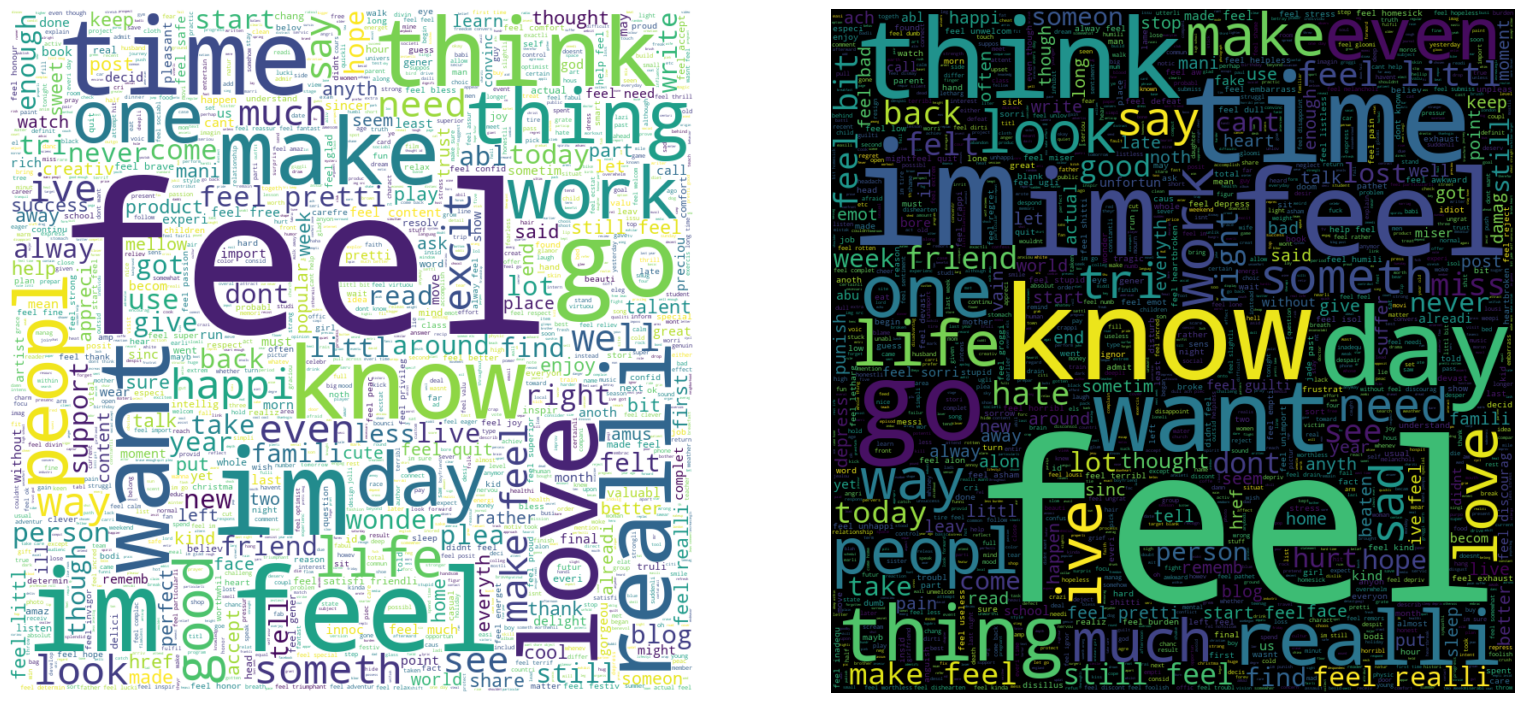

In [15]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='happy','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='sadness','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')



Text(0.5, 1.0, '')

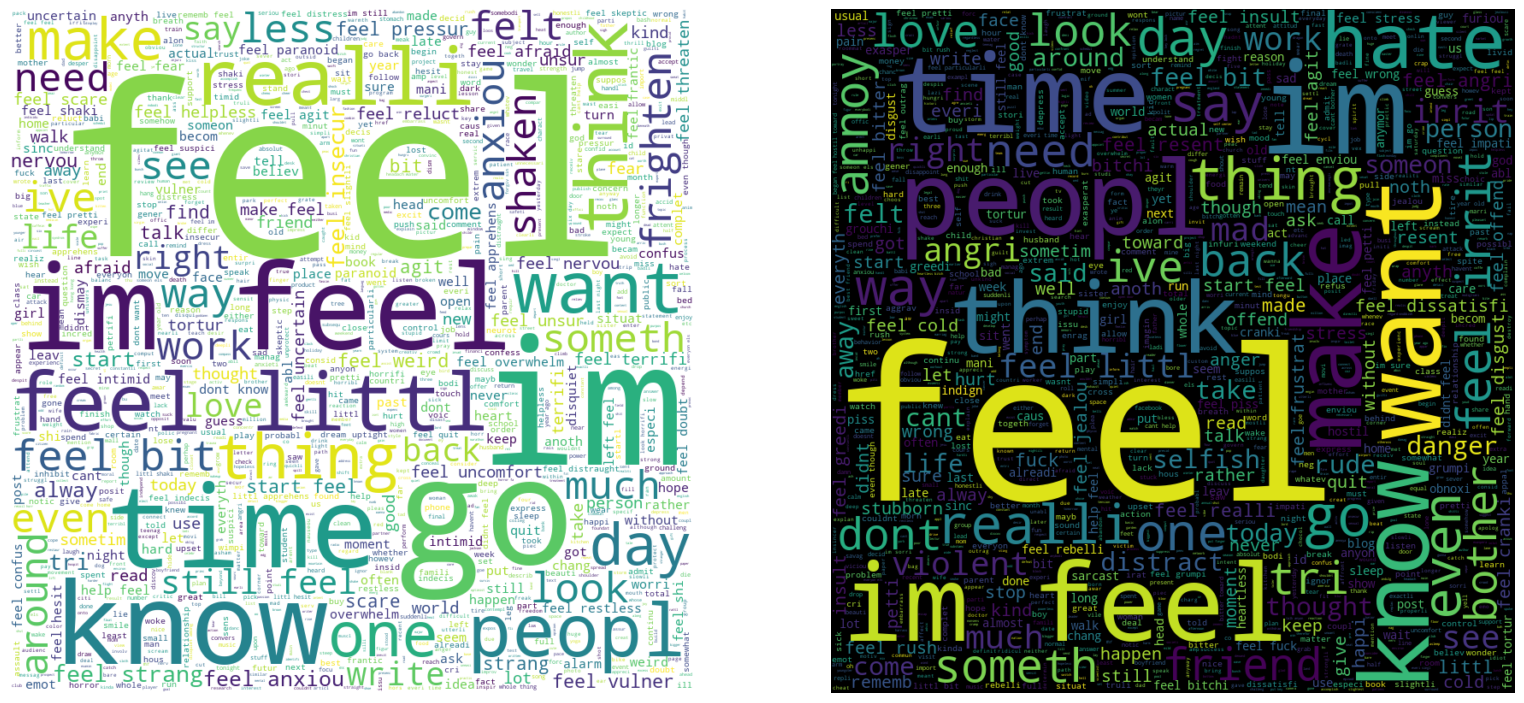

In [16]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='fear','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='anger','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')



Text(0.5, 1.0, '')

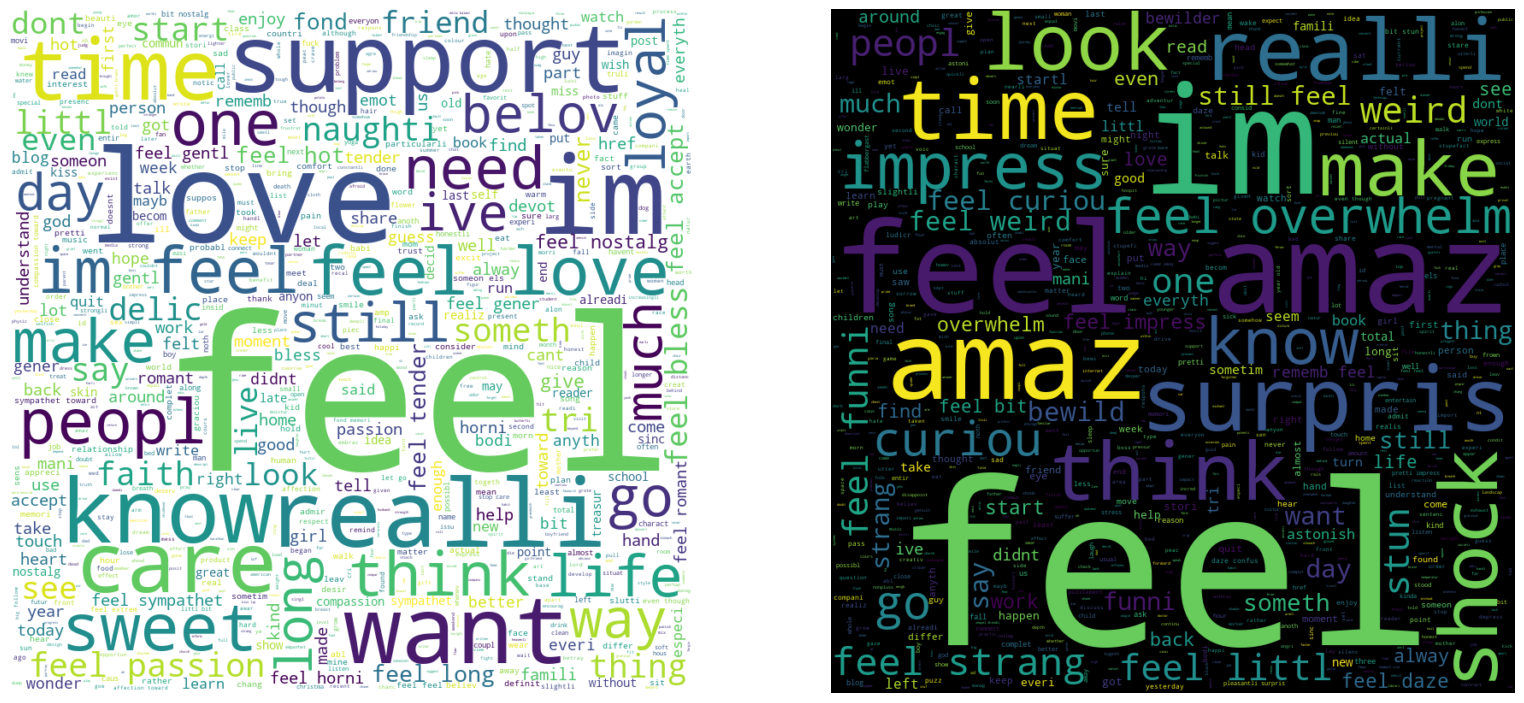

In [17]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='love','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='surprise','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

